In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

### Data preparation

In [2]:
data=pd.read_csv("/Users/victoroshimua/Machine-learning-zoomcamp-/DATA/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns=data.columns.str.lower().str.replace(" ","_")
categorical_columns=list(data.dtypes[data.dtypes=="object"].index)
for c in categorical_columns:
    data[c]=data[c].str.lower().str.replace(" ","_")
print(categorical_columns)

['customerid', 'gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'totalcharges', 'churn']


In [5]:
data.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
data.totalcharges=pd.to_numeric(data.totalcharges,errors="coerce")

In [8]:
data.totalcharges=data.totalcharges.fillna(0)

In [9]:
data.totalcharges.isnull().sum()

0

In [10]:
data.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [11]:
data.churn=(data.churn=="yes").astype(int)

In [12]:
data.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

### setting up validation framework

In [13]:
from sklearn.model_selection import train_test_split                                                      

In [14]:
data_full_train,data_test=train_test_split(data,test_size=0.2,random_state=1)
data_train,data_val=train_test_split(data_full_train,test_size=0.25,random_state=1)

In [15]:
len(data_full_train),len(data_test),len(data_val)

(5634, 1409, 1409)

In [16]:
data_train=data_train.reset_index(drop=True)
data_test=data_test.reset_index(drop=True)
data_val=data_val.reset_index(drop=True)

In [17]:
y_train=data_train.churn.values
y_val=data_val.churn.values
y_test=data_test.churn.values

In [18]:
y_train

array([0, 0, 1, ..., 1, 0, 1])

In [19]:
del data_train["churn"]
del data_val["churn"]
del data_test["churn"]

In [20]:
data_train.head().T

,0,1,2,3,4
customerid,8015-ihcgw,1960-uycnn,9250-wypll,6786-obwqr,1328-euzhc
gender,female,male,female,female,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,yes,yes
dependents,yes,no,no,yes,no
tenure,72,10,5,5,18
phoneservice,yes,yes,yes,yes,yes
multiplelines,yes,yes,yes,no,no
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,no
onlinesecurity,yes,no,no,no,no_internet_service


### eda

In [21]:
data_full_train=data_full_train.reset_index(drop=True)

In [22]:
data_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [23]:
data_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [24]:
 global_churn=data_full_train.churn.mean()

In [25]:
data_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [26]:
numeric=["tenure","monthlycharges","totalcharges"]

In [27]:
data_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [28]:
categorical=['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [29]:
data_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### feature importance

In [30]:
churn_male=data_full_train[data_full_train.gender=="male"].churn.mean()
print(churn_male,global_churn-churn_male)
churn_female=data_full_train[data_full_train.gender=="female"].churn.mean()
print(churn_female,global_churn-churn_female)
churn_partner=data_full_train[data_full_train.partner=="yes"].churn.mean()
print(churn_partner,global_churn-churn_partner)
churn_no_partner=data_full_train[data_full_train.partner=="no"].churn.mean()
print(churn_no_partner,global_churn-churn_no_partner )
churn_dependent=data_full_train[data_full_train.dependents=="yes"].churn.mean()
print(churn_dependent,global_churn-churn_dependent)
churn_no_dependent=data_full_train[data_full_train.dependents=="no"].churn.mean()
print(churn_no_dependent,global_churn-churn_no_dependent)




0.2632135306553911 0.006754520462819769
0.27682403433476394 -0.006855983216553063
0.20503330866025166 0.06493474245795922
0.3298090040927694 -0.05984095297455855
0.16566626650660263 0.10430178461160824
0.3137600806451613 -0.04379202952695044


In [31]:
churn_no_dependent/global_churn

1.162211896354266

In [32]:
for c in categorical:
    print(c)
    data_group=data_full_train.groupby(c).churn.agg(["mean","count"])
    data_group["diff"]=data_group["mean"] - global_churn
    data_group["risk"]=data_group["mean"]/ global_churn
    display(data_group)
    

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### feature importance mutual information

In [33]:
from sklearn.metrics import mutual_info_score

In [34]:
mutual_info_score(data_full_train.churn,data_full_train.contract)

0.0983203874041556

In [35]:
def mutual_info_churn_score(series):
    return mutual_info_score(series,data_full_train.churn)

In [36]:
for c in categorical:
    print(c)
    print(mutual_info_churn_score(data_full_train[c]))

gender
0.0001174846211139946
seniorcitizen
0.009410216144208144
partner
0.009967689095399745
dependents
0.012345815445534689
phoneservice
0.00022871269738296285
multiplelines
0.0008574478744731856
internetservice
0.055867945893496467
onlinesecurity
0.06308524972985574
onlinebackup
0.0469234640537918
deviceprotection
0.04345286925268559
techsupport
0.06103245991777444
streamingtv
0.03185333110086085
streamingmovies
0.03158089669519908
contract
0.0983203874041556
paperlessbilling
0.01758882715925275
paymentmethod
0.043210027531582915


In [37]:
m_info=data_full_train[categorical].apply(mutual_info_churn_score)
m_info.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### feature importance correlation 

In [38]:
data_full_train[numeric].corrwith(data_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

### one hot encoding with dict vectoriser

In [39]:
from sklearn.feature_extraction import DictVectorizer


In [40]:
train_dicts=data_train[categorical+numeric].to_dict(orient='record')
train_dicts[0]

/var/folders/zp/12tgv94s36x_34hdc9gjmywh0000gn/T/ipykernel_724/4236755364.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_dicts=data_train[categorical+numeric].to_dict(orient='record')


{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [41]:
dv=DictVectorizer(sparse=False)


In [42]:
dv.fit(train_dicts)
X_train=dv.transform(train_dicts)

In [43]:
dv.get_feature_names()

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [44]:
X_train.shape

(4225, 45)

In [45]:
val_dicts=data_val[categorical+numeric].to_dict(orient="record")
val_dicts

/var/folders/zp/12tgv94s36x_34hdc9gjmywh0000gn/T/ipykernel_724/2090826506.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  val_dicts=data_val[categorical+numeric].to_dict(orient="record")


[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'credit_card_(automatic)',
  'tenure': 71,
  'monthlycharges': 70.85,
  'totalcharges': 4973.4},
 {'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'month-to-month',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  

In [46]:
X_val=dv.transform(val_dicts)
X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]])

In [47]:
X_val.shape

(1409, 45)

### logistic regression

### training logistic regression with scikit learn

In [48]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
model.coef_[0].round(3) ### weight of the model

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [50]:
yu=model.predict(X_train) ##hard prediction 

In [51]:
y_pred=model.predict_proba(X_val)[:,1] ##soft prediction
y_pred

array([0.00899549, 0.2045903 , 0.21226192, ..., 0.13640202, 0.79971962,
       0.83736019])

In [52]:
churn_decision=(y_pred>=0.5)

In [53]:
data_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [54]:
###accuracy of the model
print(y_val)
print(churn_decision.astype(int))
(y_val==churn_decision).mean()

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


0.8034066713981547

### model interpretation

In [55]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [56]:
dv.get_feature_names()

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [57]:
dict(zip(dv.get_feature_names(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.142,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.123,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [58]:
1+1

2

In [59]:
print(_)

2


## using the model 

In [60]:
dicts_full_train=data_full_train[categorical+numeric].to_dict(orient="record")

/var/folders/zp/12tgv94s36x_34hdc9gjmywh0000gn/T/ipykernel_724/4128062341.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts_full_train=data_full_train[categorical+numeric].to_dict(orient="record")


In [61]:
dv_full_train=dv.fit(dicts_full_train)

In [62]:
X_full_train=dv.transform(dicts_full_train)

In [63]:
Y_full_train=data_full_train.churn.values

In [64]:
model=LogisticRegression()
model.fit(X_full_train,Y_full_train)

LogisticRegression()

In [65]:
dicts_test=data_test[categorical+numeric].to_dict(orient="record")
X_test=dv.transform(dicts_test)

/var/folders/zp/12tgv94s36x_34hdc9gjmywh0000gn/T/ipykernel_724/3880004527.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts_test=data_test[categorical+numeric].to_dict(orient="record")


In [66]:
y_pred=model.predict_proba(X_test)[:,1]
churn_decision_= (y_pred>=0.5)

In [67]:
(churn_decision_==y_test).mean()

0.815471965933286

In [68]:
dicts_test[10]

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [69]:
data_test[churn_decision_].customerid

3       8601-qacrs
7       8720-rqsbj
12      6168-wfvvf
30      6402-zfppi
35      0362-zbzwj
           ...    
1380    1157-bqcuw
1392    5134-ikday
1395    4910-aqffx
1403    2215-zafgx
1408    9874-qlclh
Name: customerid, Length: 312, dtype: object

In [70]:
customer=dicts_test[10]
_

3       8601-qacrs
7       8720-rqsbj
12      6168-wfvvf
30      6402-zfppi
35      0362-zbzwj
           ...    
1380    1157-bqcuw
1392    5134-ikday
1395    4910-aqffx
1403    2215-zafgx
1408    9874-qlclh
Name: customerid, Length: 312, dtype: object

In [71]:
X_small=dv.transform([customer])
X_small

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [72]:
model.predict_proba(X_small)[0,1]

0.40568109778696787

In [73]:
y_test[10]

0

In [74]:
dicts_test[10]

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

### Evaluation metrics for binary classification

## accuracy and dummy model

In [75]:
Y_pred=model.predict_proba(X_val)[:,1]
churn=(Y_pred>=0.5)

In [76]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [77]:
len(y_val)

1409

In [78]:
(y_val==churn).sum()

1130

In [79]:
1132/1409

0.8034066713981547

#### accuracy here is numbers of actual values / numbers of correct predictions 

In [80]:
(y_val==churn).mean()

0.8019872249822569

#### accuracy here is the mean of values that are same as actual values  and churn decision, where churn decision is the churn probability greater than 0.5

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(y_val,churn)

0.8019872249822569

In [83]:
from collections import Counter

In [84]:
Counter(y_train)
### class imbalance

Counter({0: 3090, 1: 1135})

## confusion matrix/table 

In [85]:
actual_positive=(y_val==1)
actual_negative=(y_val==0)
print(actual_positive)
print(actual_negative)

[False False False ... False  True  True]
[ True  True  True ...  True False False]


In [86]:
t=0.5 # where t is the threshold or churn
positive_pred=(Y_pred>=t)
negative_pred=(Y_pred<t)
print(positive_pred)
print(negative_pred)

[False False False ... False  True  True]
[ True  True  True ...  True False False]


In [87]:
tp=(actual_positive&positive_pred).sum()
tn=(actual_negative&negative_pred).sum()
fp=(actual_negative&positive_pred).sum()
fn=(actual_positive&negative_pred).sum()
tp,tn,fp,fn

(210, 920, 103, 176)

In [88]:
confusion_matrix=np.array([[tn,fp],[fn,tp]])
confusion_matrix

array([[920, 103],
       [176, 210]])

In [89]:
(confusion_matrix/confusion_matrix.sum()).round(2)
#confusion matrix percentage

array([[0.65, 0.07],
       [0.12, 0.15]])

In [90]:
## accuracy = tp+tn

### Precision and Recall

In [91]:
precision=tp/(tp+fp)
precision
# fraction of people that are predicted churn

0.670926517571885

In [92]:
Recall=tp/(tp+fn)
Recall
#fraction of people that  actually churned

0.5440414507772021

In [93]:
tp+fp
#numbers of people that are predicted as churn

313

In [94]:
tp
#numbers of people that actually churned and predicted churn correctly

210

In [95]:
tp+fn
# numbers of people that actually churned 

386

### Roc Curves

In [97]:
#tpr=true positive rate
#fpr=false positive rate
tpr=tp/tp+fn
fpr=fp+tn/fp


In [98]:
from sklearn.metrics import roc_curve 

In [103]:
fpr,tpr,thresholds=roc_curve(y_val,Y_pred)

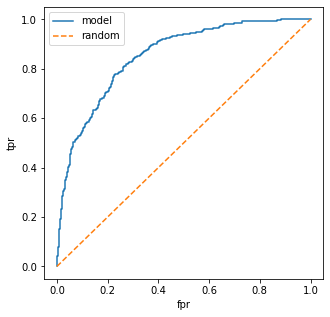

In [104]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,label="model")
plt.plot([0,1],[0,1],label="random",linestyle="--")
plt.xlabel('fpr')
plt.ylabel("tpr")
plt.legend()

## cross validation